BIG DATA ANALYTICS ASSIGNMENT

KRITI RASTOGI -- AIML B1 -- 20119051623

Q. Write a program to implement real time sentiment analysis using python. Also explore the steps used in this application.

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd

DEFINING THE COLUMN NAMES, SPECIFYING THE TEXT ENCODING AND LOADING THE DATASET

In [2]:
dataset_cols=['target','ids','date','flag','user','text']
dataset_encoding="ISO-8859-1"
df=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding=dataset_encoding,names=dataset_cols)
df.sample(5)

,target,ids,date,flag,user,text
1418261,4,2057748295,Sat Jun 06 13:35:15 PDT 2009,NO_QUERY,andygalloway93,Michael McIntyre's Comedy Roadshow on BBC ONE....
589453,0,2216990707,Wed Jun 17 20:14:32 PDT 2009,NO_QUERY,gdodson,Gots the bronchitis
954465,4,1824843810,Sun May 17 03:11:13 PDT 2009,NO_QUERY,LadyinSilk,@What_A_Legend Start with Me
842625,4,1563716802,Sun Apr 19 23:57:34 PDT 2009,NO_QUERY,ShhhFood,This morning: a big mug of coffee w/skim milk ...
265442,0,1988802960,Sun May 31 23:25:10 PDT 2009,NO_QUERY,tami4775,@ColorblindFish sleep well! i'll be up with m...


In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


FINDING NUMBER OF ENTRIES

In [4]:
print("data length = ",len(df))

data length =  1600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


FINDING SHAPE AS WELL AS COUNT OF MISSING VALUES PER COLUMN

In [6]:
df.isna().sum

<bound method DataFrame.sum of          target    ids   date   flag   user   text
0         False  False  False  False  False  False
1         False  False  False  False  False  False
2         False  False  False  False  False  False
3         False  False  False  False  False  False
4         False  False  False  False  False  False
...         ...    ...    ...    ...    ...    ...
1599995   False  False  False  False  False  False
1599996   False  False  False  False  False  False
1599997   False  False  False  False  False  False
1599998   False  False  False  False  False  False
1599999   False  False  False  False  False  False

[1600000 rows x 6 columns]>

In [7]:
df['target'].value_counts

<bound method IndexOpsMixin.value_counts of 0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: target, Length: 1600000, dtype: int64>

PLOTTING POSITIVE VS NEGATIVE SENTIMENT

C:\Users\Kriti Rastogi\AppData\Local\Temp\ipykernel_17984\493194497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='target', palette='coolwarm')


<Axes: xlabel='target', ylabel='count'>

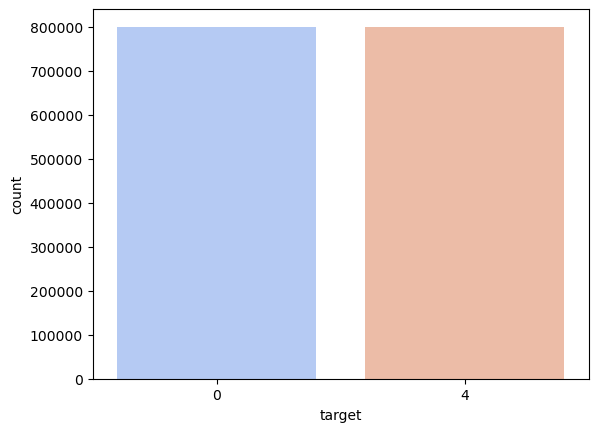

In [8]:
import seaborn as sns
sns.countplot(data=df,x='target', palette='coolwarm')

PRE PROCESSING OF THE DATA

In [9]:
data=df[['text','target']]
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


STANDARDISING THE SENTIMENT LABELS

In [10]:
data['target']=data['target'].replace(4,1)
data['target'].value_counts()

C:\Users\Kriti Rastogi\AppData\Local\Temp\ipykernel_17984\389418106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']=data['target'].replace(4,1)


target
0    800000
1    800000
Name: count, dtype: int64

PREPARING A BALANCED, SMALLER DATASET & COMBINING BOTH POSOTIVE AND NEGATIVE SUBSETS INTO SINGLE DATAFRAME

In [11]:
data_pos=data[data['target']==1]
data_neg=data[data['target']==0]
data_pos=data_pos.iloc[:int(20000)]
data_neg=data_neg.iloc[:int(20000)]
dataset=pd.concat([data_pos,data_neg])
dataset.shape

(40000, 2)

In [12]:
dataset.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


CONVERTING SENTIMENTS TO LOWER CASE

In [13]:
dataset['text']=dataset['text'].str.lower()
dataset.head()

,text,target
800000,i love @health4uandpets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@darealsunisakim thanks for the twitter add, s...",1
800003,being sick can be really cheap when it hurts t...,1
800004,@lovesbrooklyn2 he has that effect on everyone,1


LIST OF STOPWORDS WHICH DON'T CARRY MUCH MEANING FOR SENTIMENT ANALYSIS

In [14]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

REMOVING STOPWORDS FROM ALL TWEETS

In [15]:
stopwords=set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])
dataset['text']=dataset['text'].apply(lambda text:cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

REMOVING PUNCTUATION AND CREATING A TRANSLATION TABLE MAPPING PUNCTUATION MARK TO 'NOTHING'

In [16]:
import string 
english_punctuations=string.punctuation
punctuations_list=english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

CLEANING OF REPEATED CHARACTERS IN THE TWEETS

In [17]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

CLEANING THE URLs FROM THE TWEETS

In [18]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^\s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Kriti Rastogi\AppData\Local\Temp\ipykernel_17984\2667794635.py:2: SyntaxWarning: invalid escape sequence '\s'
  return re.sub('((www.[^s]+)|(https?://[^\s]+))',' ',data)


19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [19]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

CONVERTING EACH TWEET TO A TOKEN OF WORDS

In [20]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\s+', gaps = True)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Kriti Rastogi\AppData\Local\Temp\ipykernel_17984\262700751.py:2: SyntaxWarning: invalid escape sequence '\s'
  tokenizer = RegexpTokenizer('\s+', gaps = True)


In [21]:
dataset['text'].tail()

19995    [not, much, time, off, weekend, work, trip, ma...
19996                                 [one, day, holidays]
19997                [feeling, right, hate, damn, humprey]
19998    [geezi, hv, read, whole, book, personality, ty...
19999    [threw, sign, donnie, bent, over, get, but, th...
Name: text, dtype: object

In [22]:
dataset['text'].head()


800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

REDUCING WORDS TO ROOT FORM AND STEMMING THEM INDIVIDUALLY

In [23]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000               [love, healthuandpet, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
Name: text, dtype: object

LEMMATIZATION OF THE WORDS

In [24]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000               [love, healthuandpet, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
Name: text, dtype: object

In [25]:
dataset.head()

,text,target
800000,"[love, healthuandpet, u, guy, r, best]",1
800001,"[im, meet, one, besti, tonight, cant, wait, gi...",1
800002,"[darealsunisakim, thank, twitter, add, sunisa,...",1
800003,"[sick, realli, cheap, hurt, much, eat, real, f...",1
800004,"[lovesbrooklyn, effect, everyon]",1


DISPLAYING THE TEXT DATA FOR ROWS HAVING TARGET=0

In [26]:
dataset[dataset['target']==0]['text']

0        [switchfoot, httptwitpiccomzl, a, s, bummer, s...
1        [upset, cant, updat, facebook, text, it, might...
2        [kenichan, dive, mani, time, ball, manag, save...
3                   [whole, bodi, feel, itchi, like, fire]
4        [nationwideclass, no, it, not, behav, all, im,...
                               ...                        
19995    [not, much, time, off, weekend, work, trip, ma...
19996                                  [one, day, holiday]
19997                   [feel, right, hate, damn, humprey]
19998    [geezi, hv, read, whole, book, person, type, e...
19999    [threw, sign, donni, bent, over, get, but, thi...
Name: text, Length: 20000, dtype: object

In [27]:
import matplotlib.pyplot as plt

In [28]:
import sys
print(sys.executable)

c:\ProgramData\anaconda3\python.exe


GENERATING A WORD CLOUD SHOWING MOST FREQUENT WORDS FOR THE NEGATIVE TWEETS

BIGGER WORDS=MORE OFTENLY APPEARED

(-0.5, 1599.5, 799.5, -0.5)

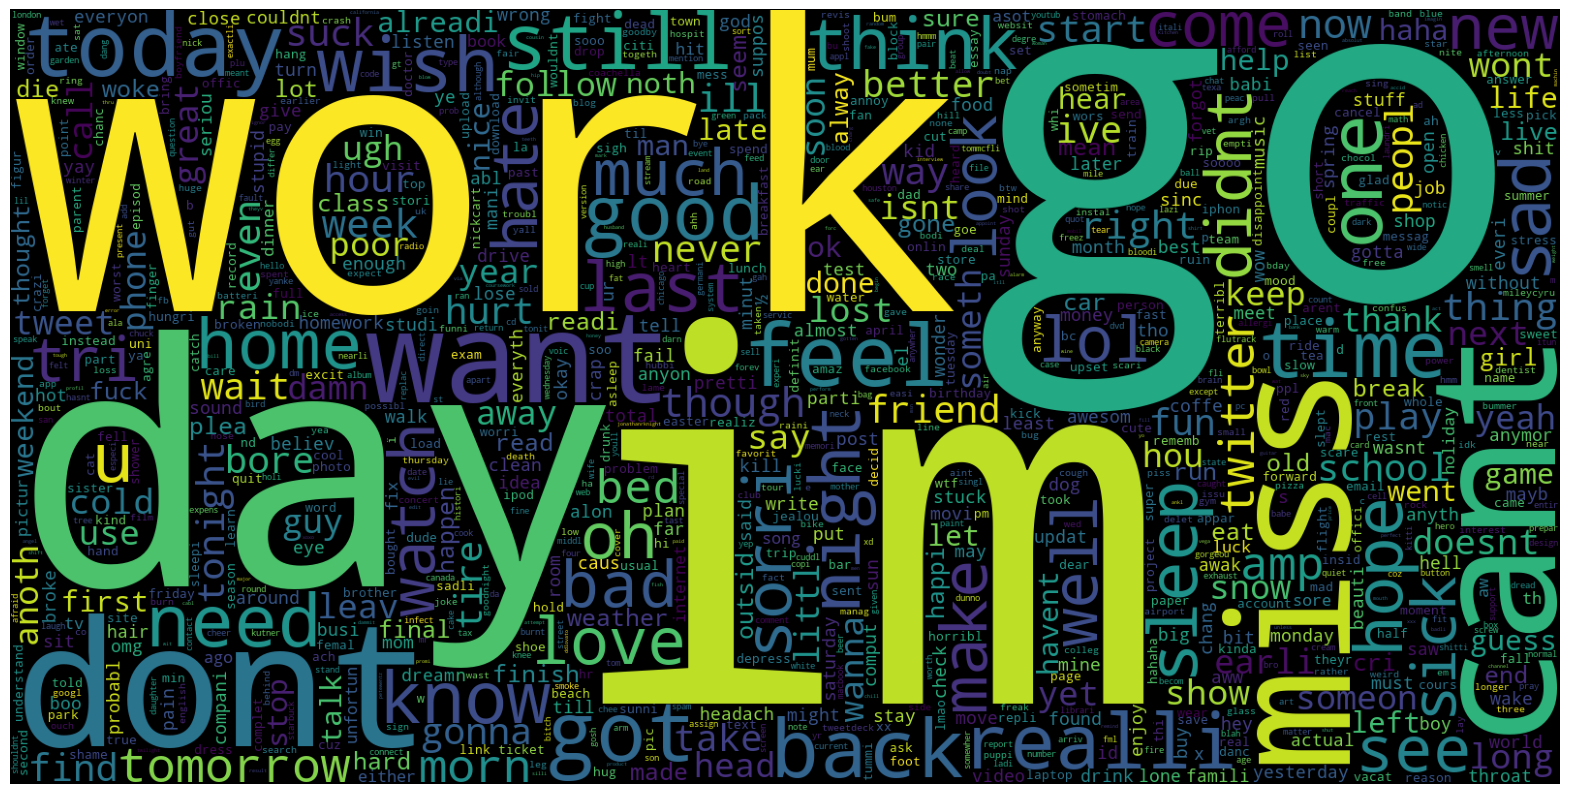

In [29]:
from wordcloud import WordCloud
data_neg = dataset[dataset['target']==0]['text'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

WORD CLOUD FOR POSITIVE WORDS

(-0.5, 1599.5, 799.5, -0.5)

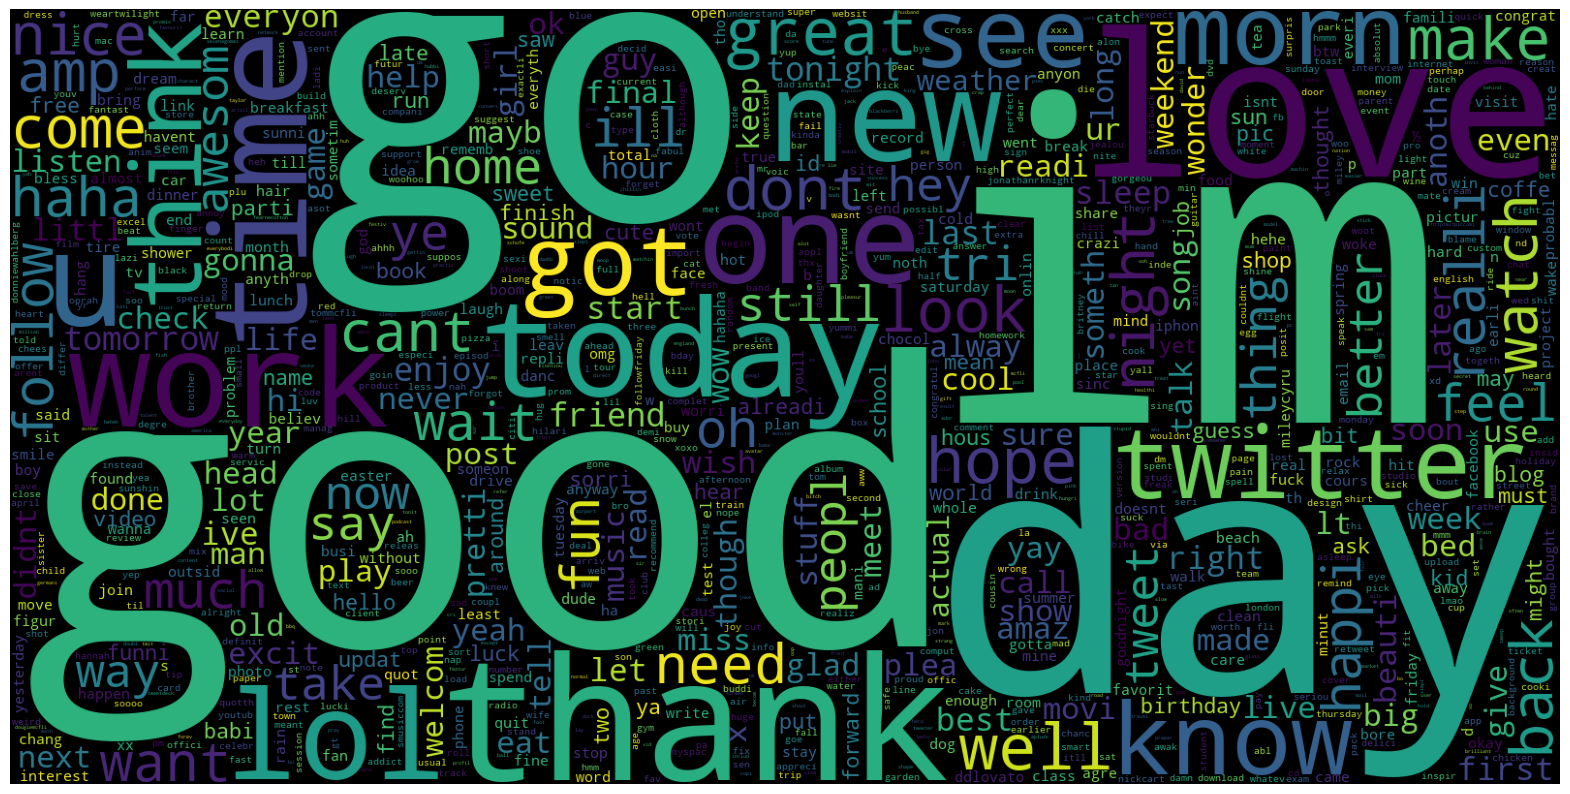

In [30]:
data_neg = dataset[dataset['target']==1]['text'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

In [31]:
new_data=dataset
new_data['text'] = dataset['text'].apply(lambda x: ' '.join(x) )
new_data.head()

,text,target
800000,love healthuandpet u guy r best,1
800001,im meet one besti tonight cant wait girl talk,1
800002,darealsunisakim thank twitter add sunisa got m...,1
800003,sick realli cheap hurt much eat real food plu ...,1
800004,lovesbrooklyn effect everyon,1


In [32]:
X=new_data.text
y=new_data.target

SPLITTING INTO TRAINING AND TESTING DATA 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(40000,)
(36000,)
(4000,)


PREPARING DATA USING TF-IDF (Term Frequency–Inverse Document Frequency)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  5000


In [35]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(36000, 5000)
(4000, 5000)


USING SVM CLASSIFICATION

In [36]:
from sklearn.svm import SVC

In [37]:
clf=SVC()

In [38]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

PREPARING THE CONFUSION MATRIX AND ACCURACY SCORE

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix
test_acc=accuracy_score(y_test,y_pred)
print(test_acc)
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.7755
[[1506  497]
 [ 401 1596]]


<Axes: >

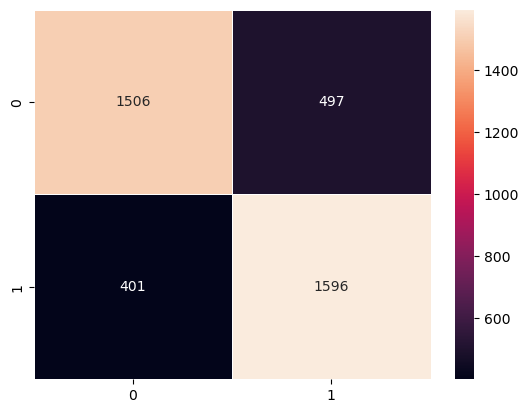

In [40]:
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

GETTING THE ROC CURVE FOR THE ANALYSED SENTIMENTS

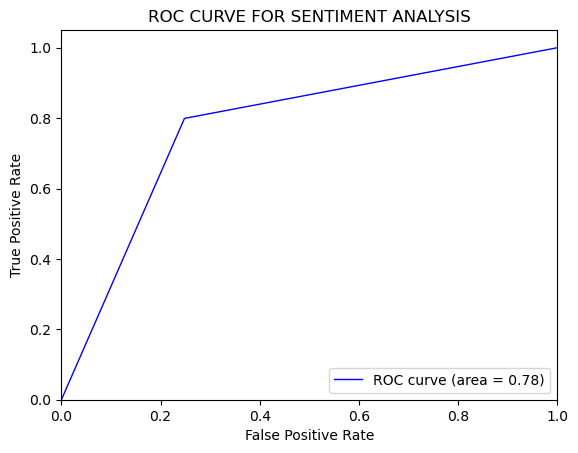

In [42]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE FOR SENTIMENT ANALYSIS')
plt.legend(loc="lower right")
plt.show()

The model has a fairly good performance — it can correctly distinguish between positive and negative tweets about 77% of the time on average.

----- END OF CODE -----